In [560]:
import pandas as pd
import ggplot as gp
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('ggplot')
import matplotlib.dates as mdates

from sklearn.preprocessing import scale

In [580]:
#Create Dataframes

anikS = pd.read_csv('../raw_data/StockFundamentals/AnikaTherapeutics/ANIK.csv')
ecS = pd.read_csv('../raw_data/StockFundamentals/EasternCompany/EML.csv')
pbS = pd.read_csv('../raw_data/StockFundamentals/PrivateBancorp/PVTB.csv')
rmxS = pd.read_csv('../raw_data/StockFundamentals/REMAX/RMAX.csv')
stkS = pd.read_csv('../raw_data/StockFundamentals/ShutterStock/SSTK.csv')


# Convert 'asof_date' dtype from str to datetime

anikS['asof_date'] = pd.to_datetime(anikS['asof_date']).dt.date
ecS['asof_date'] = pd.to_datetime(ecS['asof_date']).dt.date
pbS['asof_date'] = pd.to_datetime(pbS['asof_date']).dt.date
rmxS['asof_date'] = pd.to_datetime(rmxS['asof_date']).dt.date
stkS['asof_date'] = pd.to_datetime(stkS['asof_date']).dt.date


# Rename columns to 'Period' to be compatible with YChart CSVs

anikS = anikS.rename(columns={'asof_date': 'Period'})
ecS = ecS.rename(columns={'asof_date': 'Period'})
pbS = pbS.rename(columns={'asof_date': 'Period'})
rmxS = rmxS.rename(columns={'asof_date': 'Period'})
stkS = stkS.rename(columns={'asof_date': 'Period'})


# Index to 'Period'

anikS = anikS.set_index('Period',drop=True, append=False, inplace=False, verify_integrity=False)
ecS = ecS.set_index('Period',drop=True, append=False, inplace=False, verify_integrity=False)
pbS = pbS.set_index('Period',drop=True, append=False, inplace=False, verify_integrity=False)
rmxS = rmxS.set_index('Period',drop=True, append=False, inplace=False, verify_integrity=False)
stkS = stkS.set_index('Period',drop=True, append=False, inplace=False, verify_integrity=False)


# Keep only the columns we want

anikS = anikS[['bull_minus_bear','bull_bear_msg_ratio','total_scanned_messages']]
ecS = ecS[['bull_minus_bear','bull_bear_msg_ratio','total_scanned_messages']]
pbS = pbS[['bull_minus_bear','bull_bear_msg_ratio','total_scanned_messages']]
rmxS = rmxS[['bull_minus_bear','bull_bear_msg_ratio','total_scanned_messages']]
stkS = stkS[['bull_minus_bear','bull_bear_msg_ratio','total_scanned_messages']]


# combine company data by category

    # bull_minus_bear

bull_minus_bear = pd.concat([anikS,ecS['bull_minus_bear'],pbS['bull_minus_bear'],rmxS['bull_minus_bear'],stkS['bull_minus_bear']],axis=1, join='inner')
bull_minus_bear = bull_minus_bear.drop('bull_bear_msg_ratio', 1)
bull_minus_bear = bull_minus_bear.drop('total_scanned_messages', 1)

    # bull_bear_msg_ratio
    
bb_msg_ratio = pd.concat([anikS,ecS['bull_bear_msg_ratio'],pbS['bull_bear_msg_ratio'],rmxS['bull_bear_msg_ratio'],stkS['bull_bear_msg_ratio']],axis=1,join='inner')
bb_msg_ratio = bb_msg_ratio.drop('bull_minus_bear', 1)
bb_msg_ratio = bb_msg_ratio.drop('total_scanned_messages', 1)

    #total_scanned_messages

total_scn_msgs = pd.concat([anikS,ecS['total_scanned_messages'],pbS['total_scanned_messages'],rmxS['total_scanned_messages'],stkS['total_scanned_messages']],axis=1,join='inner')
total_scn_msgs = total_scn_msgs.drop('bull_minus_bear', 1)
total_scn_msgs = total_scn_msgs.drop('bull_bear_msg_ratio', 1)


# get the mean of each category

mean_bull_minus_bear = bull_minus_bear.mean(axis=1)
mean_bb_msg_ratio = bb_msg_ratio.mean(axis=1)
mean_total_scn_msgs = total_scn_msgs.mean(axis=1)

#print(mean_bull_minus_bear)
#print(mean_bb_msg_ratio)
#print(mean_total_scn_msgs)

print(mean_bull_minus_bear)

Period
2016-11-04    0.480000
2016-11-03    1.196000
2016-10-04   -0.668000
2016-09-14    0.500000
2016-07-25   -0.246000
2016-06-30    0.253467
2016-06-29    2.306889
2016-06-06    0.310000
2016-05-05    1.200000
2016-05-04   -0.357000
2016-05-02    0.150000
2016-04-07    0.310000
2016-04-04    0.249000
2015-12-30    0.838000
2015-12-29    0.410000
2015-12-17    1.286000
2015-12-15    1.402000
2015-12-10    0.666000
2015-11-09    0.820000
dtype: float64


In [562]:
# Price Data

anikP = pd.read_csv('../raw_data/StockFundamentals/AnikaTherapeutics/ANIK_price_data.csv')
armkP = pd.read_csv('../raw_data/StockFundamentals/AMARKPreciousMetals/AMRK_price_data.csv')
ecP = pd.read_csv('../raw_data/StockFundamentals/EasternCompany/EML_price_data.csv')
pbP = pd.read_csv('../raw_data/StockFundamentals/PrivateBancorp/PVTB_price_data.csv')
rmxP = pd.read_csv('../raw_data/StockFundamentals/REMAX/RMAX_price_data.csv')
stkP = pd.read_csv('../raw_data/StockFundamentals/ShutterStock/SSTK_price_data.csv')


P = pd.concat([anikP['Period'],anikP['Close'], armkP['Close'], ecP['Close'], pbP['Close'], rmxP['Close'], stkP['Close']],axis=1, join='inner')
P = P.set_index('Period',drop=True, append=False, inplace=False, verify_integrity=False)

print(P)

meanP = P.mean(axis=1)
#print(meanP)

            Close    Close    Close   Close  Close  Close
Period                                                   
2016-11-30  46.66  16.3600  21.4500  46.780  49.00  47.06
2016-11-29  46.34  16.6000  20.9000  46.960  50.15  48.07
2016-11-28  46.10  16.5500  21.5000  46.800  48.80  48.74
2016-11-25  46.63  16.2700  21.0000  46.810  49.15  48.89
2016-11-23  46.73  16.6100  20.7500  46.690  48.60  49.49
2016-11-22  46.13  16.6300  19.8500  46.660  48.45  49.56
2016-11-21  46.01  16.2800  19.3000  46.670  48.20  49.59
2016-11-18  45.27  16.5300  19.4000  46.240  47.35  49.60
2016-11-17  45.09  16.2000  19.5000  46.120  47.05  49.64
2016-11-16  44.68  16.2800  20.0000  46.120  46.45  49.25
2016-11-15  43.94  16.5000  19.9500  46.130  47.00  49.10
2016-11-14  44.56  16.6300  19.9500  45.810  49.20  49.21
2016-11-11  45.56  17.0500  20.0000  45.600  49.15  49.30
2016-11-10  45.34  17.3600  19.9875  45.760  49.00  47.59
2016-11-09  43.56  17.8500  19.9500  45.650  48.40  48.51
2016-11-08  43

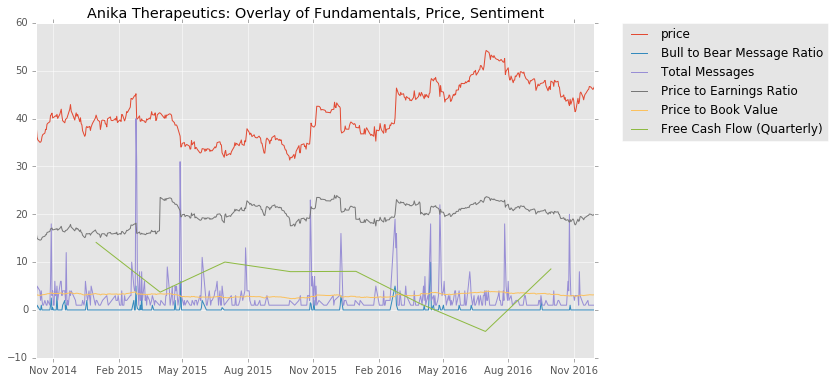

In [581]:
# combine all sentiment ratios into one chart
#mp=pd.DataFrame(meanP,columns=['meanp'])
#mp.index=pd.to_datetime(mp.index)
#sentiment = pd.concat([mean_bull_minus_bear, mean_bb_msg_ratio, mean_total_scn_msgs], axis=1, join='inner')



#overall = sentiment.join(mp,how='left',rsuffix='_x')

#X = pd.DataFrame(scale(overall),columns=overall.columns,index=overall.index)

#bull_minus_bear = bull_minus_bear.drop('bull_bear_msg_ratio', 1)


anikP.index=pd.to_datetime(anikP.index)
anikS.index=pd.to_datetime(anikS.index)

#anikP=anikP.index['2016-01-01':'2016-12-03']

#print(anikP)
#print(overall)

#plt.plot(X[[0,1,2,'meanp']])
#plt.show()

#plt.plot(anikP,label='Anik Price')
plt.plot(anikP,label='price')
#plt.plot(anikS['bull_minus_bear'],label='Bull Minus Bear')
plt.plot(anikS['bull_bear_msg_ratio'],label='Bull to Bear Message Ratio')
plt.plot(anikS['total_scanned_messages'], label='Total Messages')

plt.plot(anikPE['PE Ratio (TTM)'], label='Price to Earnings Ratio')
#plt.plot(anikPEG['PEG Ratio (TTM)'], label='PEG Ratio (incomplete data)')
plt.plot(anikPBV['Price to Book Value'], label='Price to Book Value')
plt.plot(anikFCF['Free Cash Flow (Quarterly)'], label='Free Cash Flow (Quarterly)')
#plt.plot(anikDE['Debt to Equity Ratio (Quarterly)'], label='Debt to Equity Ratio (incomplete data)')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Anika Therapeutics: Overlay of Fundamentals, Price, Sentiment')
plt.show()

In [582]:
# combine all sentiment ratios into one chart
mp=pd.DataFrame(meanP,columns=['meanp'])
mp.index=pd.to_datetime(mp.index)
sentiment = pd.concat([mean_bull_minus_bear, mean_bb_msg_ratio, mean_total_scn_msgs], axis=1, join='inner')
sentiment.index=pd.to_datetime(sentiment.index)
overall = sentiment.join(mp,how='left',rsuffix='_x')

X = pd.DataFrame(scale(overall),columns=overall.columns,index=overall.index)

#print(sentiment)
#print(overall)

overall.corr()

,0,1,2,meanp
0,1.000000,0.542865,0.428183,-0.358795
1,0.542865,1.000000,0.868017,0.101408
2,0.428183,0.868017,1.000000,0.156390
meanp,-0.358795,0.101408,0.156390,1.000000


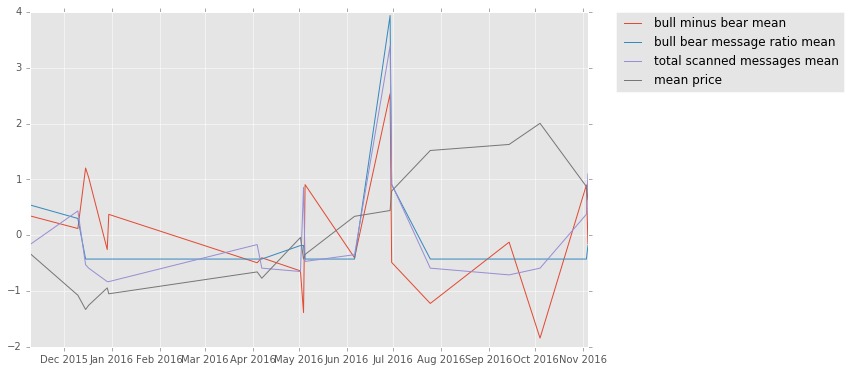

In [564]:
#plt.plot(X[[0,1,2,'meanp']])
#plt.show()

plt.plot(X[0],label='bull minus bear mean')
plt.plot(X[1],label='bull bear message ratio mean')
plt.plot(X[2],label='total scanned messages mean')
plt.plot(X['meanp'], label='mean price')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
concat

In [565]:
anikDE = pd.read_csv('../raw_data/StockFundamentals/AnikaTherapeutics/ANIK_debt_equity_ratio_data.csv')
anikPE = pd.read_csv('../raw_data/StockFundamentals/AnikaTherapeutics/ANIK_pe_ratio_data.csv')
anikPEG = pd.read_csv('../raw_data/StockFundamentals/AnikaTherapeutics/ANIK_peg_ratio_data.csv')
anikFCF = pd.read_csv('../raw_data/StockFundamentals/AnikaTherapeutics/ANIK_free_cash_flow_data.csv')
anikPBV = pd.read_csv('../raw_data/StockFundamentals/AnikaTherapeutics/ANIK_price_to_book_value_data.csv')

anikPE['Period']=pd.to_datetime(anikPE['Period'])
anikPE = anikPE[anikPE['Period'] > pd.to_datetime('2014-10-07')]
anikPE.index=anikPE['Period']
del anikPE['Period']

anikPEG['Period']=pd.to_datetime(anikPEG['Period'])
anikPEG = anikPEG[anikPEG['Period'] > pd.to_datetime('2016-03-31')]
anikPEG.index=anikPEG['Period']
del anikPEG['Period']

anikDE['Period']=pd.to_datetime(anikDE['Period'])
anikDE = anikDE[anikDE['Period'] > pd.to_datetime('2014-10-07')]
anikDE.index=anikDE['Period']
del anikDE['Period']

anikFCF['Period']=pd.to_datetime(anikFCF['Period'])
anikFCF = anikFCF[anikFCF['Period'] > pd.to_datetime('2014-10-07')]
anikFCF.index=anikFCF['Period']
del anikFCF['Period']

anikPBV['Period']=pd.to_datetime(anikPBV['Period'])
anikPBV = anikPBV[anikPBV['Period'] > pd.to_datetime('2014-10-07')]
anikPBV.index=anikPBV['Period']
del anikPBV['Period']



anikDE.index=pd.to_datetime(anikDE.index)
anikPE.index=pd.to_datetime(anikPE.index)
anikPEG.index=pd.to_datetime(anikPEG.index)
anikFCF.index=pd.to_datetime(anikFCF.index)
anikPBV.index=pd.to_datetime(anikPBV.index)

#anikF = pd.concat([anikDE, anikPE['PE Ratio (TTM)'],anikPEG['PEG Ratio (TTM)'],anikFCF['Free Cash Flow (Quarterly)'],anikPBV['Price to Book Value']],axis=1,join='inner')
#print(anikF)
#anikPEG

In [566]:
anikP = anikP.drop('Open', 1)
anikP = anikP.drop('High', 1)
anikP = anikP.drop('Low', 1)
anikP = anikP.drop('Volume', 1)

anikP['Period']=pd.to_datetime(anikP['Period'])
anikP=anikP[(anikP['Period'].dt.year) > 2013]
anikP = anikP[anikP['Period'] > pd.to_datetime('2014-10-07')]

anikP = anikP.set_index('Period',drop=True, append=False, inplace=False, verify_integrity=False)

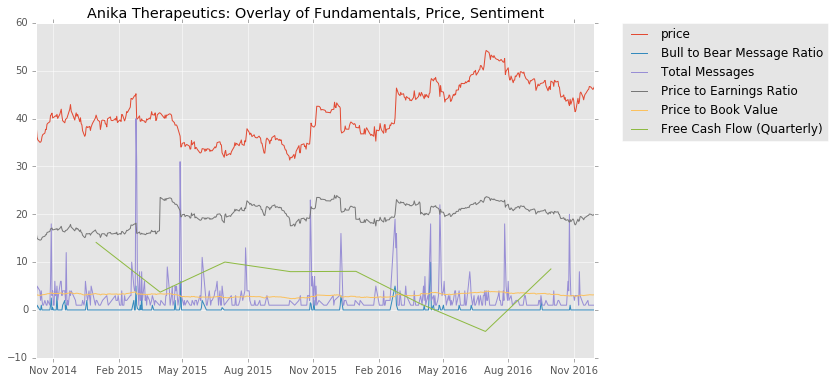

In [579]:
# combine all sentiment ratios into one chart
#mp=pd.DataFrame(meanP,columns=['meanp'])
#mp.index=pd.to_datetime(mp.index)
#sentiment = pd.concat([mean_bull_minus_bear, mean_bb_msg_ratio, mean_total_scn_msgs], axis=1, join='inner')



#overall = sentiment.join(mp,how='left',rsuffix='_x')

#X = pd.DataFrame(scale(overall),columns=overall.columns,index=overall.index)

#bull_minus_bear = bull_minus_bear.drop('bull_bear_msg_ratio', 1)


anikP.index=pd.to_datetime(anikP.index)
anikS.index=pd.to_datetime(anikS.index)

#anikP=anikP.index['2016-01-01':'2016-12-03']

#print(anikP)
#print(overall)

#plt.plot(X[[0,1,2,'meanp']])
#plt.show()

#plt.plot(anikP,label='Anik Price')
plt.plot(anikP,label='price')
#plt.plot(anikS['bull_minus_bear'],label='Bull Minus Bear')
plt.plot(anikS['bull_bear_msg_ratio'],label='Bull to Bear Message Ratio')
plt.plot(anikS['total_scanned_messages'], label='Total Messages')

plt.plot(anikPE['PE Ratio (TTM)'], label='Price to Earnings Ratio')
#plt.plot(anikPEG['PEG Ratio (TTM)'], label='PEG Ratio (incomplete data)')
plt.plot(anikPBV['Price to Book Value'], label='Price to Book Value')
plt.plot(anikFCF['Free Cash Flow (Quarterly)'], label='Free Cash Flow (Quarterly)')
#plt.plot(anikDE['Debt to Equity Ratio (Quarterly)'], label='Debt to Equity Ratio (incomplete data)')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Anika Therapeutics: Overlay of Fundamentals, Price, Sentiment')
plt.show()

In [568]:
#PD=anikPE.join(, how= 'left', lsuffix='_x')
#PDG=PD.join(anikPEG, how='left',lsuffix='_x')
#PD.corr()

In [569]:
anikSPE = pd.concat([anikPE['PE Ratio (TTM)'],anikP['Close'],anikS],axis=1, join='inner')
print(anikSPE.corr())

#print(pd.scatter_matrix(anikSPE, figsize=(10, 10), diagonal='hist'))

                        PE Ratio (TTM)     Close  bull_minus_bear  \
PE Ratio (TTM)                1.000000  0.425430         0.004357   
Close                         0.425430  1.000000        -0.102315   
bull_minus_bear               0.004357 -0.102315         1.000000   
bull_bear_msg_ratio          -0.037617 -0.011882        -0.072977   
total_scanned_messages       -0.014694  0.005825         0.002231   

                        bull_bear_msg_ratio  total_scanned_messages  
PE Ratio (TTM)                    -0.037617               -0.014694  
Close                             -0.011882                0.005825  
bull_minus_bear                   -0.072977                0.002231  
bull_bear_msg_ratio                1.000000                0.573815  
total_scanned_messages             0.573815                1.000000  


In [575]:
anikSPEG = pd.concat([anikPEG['PEG Ratio (TTM)'],anikP['Close'],anikS],axis=1, join='inner')

#print(anikPEG['PEG Ratio (TTM)'])
print(anikSPEG.corr())

#anikSPEG

# maybe it's because PEG has missing data? why not NaN then?

                           Close  bull_minus_bear  bull_bear_msg_ratio  \
Close                   1.000000         0.020234            -0.018131   
bull_minus_bear         0.020234         1.000000             0.062683   
bull_bear_msg_ratio    -0.018131         0.062683             1.000000   
total_scanned_messages -0.084577         0.179633             0.397086   

                        total_scanned_messages  
Close                                -0.084577  
bull_minus_bear                       0.179633  
bull_bear_msg_ratio                   0.397086  
total_scanned_messages                1.000000  


In [571]:
anikSFCF = pd.concat([anikFCF['Free Cash Flow (Quarterly)'],anikP['Close'],anikS],axis=1, join='inner')
print(anikSFCF.corr())

                            Free Cash Flow (Quarterly)     Close  \
Free Cash Flow (Quarterly)                    1.000000 -0.685470   
Close                                        -0.685470  1.000000   
bull_minus_bear                               0.275708  0.004037   
bull_bear_msg_ratio                                NaN       NaN   
total_scanned_messages                        0.107530 -0.350869   

                            bull_minus_bear  bull_bear_msg_ratio  \
Free Cash Flow (Quarterly)         0.275708                  NaN   
Close                              0.004037                  NaN   
bull_minus_bear                    1.000000                  NaN   
bull_bear_msg_ratio                     NaN                  NaN   
total_scanned_messages            -0.560239                  NaN   

                            total_scanned_messages  
Free Cash Flow (Quarterly)                0.107530  
Close                                    -0.350869  
bull_minus_bear        

In [572]:
anikSDE = pd.concat([anikDE['Debt to Equity Ratio (Quarterly)'],anikP['Close'],anikS],axis=1, join='inner')
print(anikSDE.corr())

                                  Debt to Equity Ratio (Quarterly)  Close  \
Debt to Equity Ratio (Quarterly)                               NaN    NaN   
Close                                                          NaN    NaN   
bull_minus_bear                                                NaN    NaN   
bull_bear_msg_ratio                                            NaN    NaN   
total_scanned_messages                                         NaN    NaN   

                                  bull_minus_bear  bull_bear_msg_ratio  \
Debt to Equity Ratio (Quarterly)              NaN                  NaN   
Close                                         NaN                  NaN   
bull_minus_bear                               NaN                  NaN   
bull_bear_msg_ratio                           NaN                  NaN   
total_scanned_messages                        NaN                  NaN   

                                  total_scanned_messages  
Debt to Equity Ratio (Quarterly) 

In [573]:
anikSPBV = pd.concat([anikPBV['Price to Book Value'],anikP['Close'],anikS],axis=1, join='inner')
print(anikSPBV.corr())

                        Price to Book Value     Close  bull_minus_bear  \
Price to Book Value                1.000000  0.805240        -0.067524   
Close                              0.805240  1.000000        -0.102315   
bull_minus_bear                   -0.067524 -0.102315         1.000000   
bull_bear_msg_ratio                0.041754 -0.011882        -0.072977   
total_scanned_messages             0.066278  0.005825         0.002231   

                        bull_bear_msg_ratio  total_scanned_messages  
Price to Book Value                0.041754                0.066278  
Close                             -0.011882                0.005825  
bull_minus_bear                   -0.072977                0.002231  
bull_bear_msg_ratio                1.000000                0.573815  
total_scanned_messages             0.573815                1.000000  
